# Predicting Bike Rentals

#### Author: Salvatore Porcheddu
#### Date: 2021-09-13

## Introduction

In this project, we will predict how many bikes are rented every hour in Washington D.C.; the data used in this project is from the UCI Machine Learning Repository and can be found [here](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset). 

In [59]:
# importing relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Step 1: Importing and Exploring the Data

In [52]:
# reading the data

bike_rentals = pd.read_csv("hour.csv", parse_dates=["dteday"])

bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


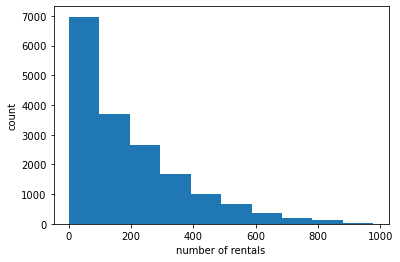

In [53]:
# looking at the distribution of the total number of bike rentals (cnt column, which is the sum of the two columns casual and registered)

plt.hist(bike_rentals["cnt"])
plt.xlabel("number of rentals")
plt.ylabel("count")
plt.show()

In [54]:
# exploring correlations in the dataset

bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


### Step 2: Feature Engineering

In [55]:
# defining a function to segment the hour of day in four different labels (hr is basically a categorical variable expressed in numbers)

def assign_label(number):
    if number in range(6, 12):
        return 1
    elif number in range(12, 18):
        return 2
    elif number in range(18, 24):
        return 3
    else:
        return 4
    
# creating a new column with the new labels

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

bike_rentals[["hr", "time_label"]].head(24)

,hr,time_label
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4
5,5,4
6,6,1
7,7,1
8,8,1
9,9,1


### Step 3: Splitting the Data into Train and Test Sets

Since ``cnt`` is a numeric variable, this is a regression problem: we will use the Root Mean Squared Error (RMSE) as an error metric, as it expresses the average error made by our model in the same unit of measurement as the target variable.

We will also need to drop some of the variables, specifically:
- the ``hr`` column, because we already segmented its values into the ``time_label`` column;
- the ``casual`` and ``registered`` variables, because their sum is equal to the ``cnt`` variable and thus they just repeat the same information;
- the ``dteday`` column, because it also repeats information that we can already find in the other time variables such as ``yr``, ``mnths`` and ``weekday``;
- the ``instant`` column, because it just contains an ID number for each row and thus does not tell us anything useful for prediction;
- the ``temp`` column, because we already have the adjusted temperature in the ``atemp`` column.

In [56]:
# dropping 'hr', 'casual' and 'registered' columns

bike_rentals.drop(columns=["hr", "casual", "registered", "dteday", "instant", "temp"], inplace=True)

# sampling data for the training set (80% of total data)

train = bike_rentals.sample(frac=.8, replace=False, random_state=27)

# everything else goes into the test set

test = bike_rentals.iloc[~bike_rentals.index.isin(train.index), :].copy()

print("TRAIN\n", train.head(), "\n")
print("TEST\n", test.head(), "\n")
print(train.shape)
print(test.shape)

TRAIN
        season  yr  mnth  holiday  weekday  workingday  weathersit   atemp  \
7610        4   0    11        0        5           1           1  0.3333   
1137        1   0     2        0        0           0           1  0.1818   
14926       3   1     9        0        3           1           2  0.5000   
1406        1   0     3        0        4           1           1  0.2121   
5529        3   0     8        0        2           1           1  0.6212   

        hum  windspeed  cnt  time_label  
7610   0.31     0.1343  378           2  
1137   0.44     0.5522   18           4  
14926  0.63     0.2537    5           4  
1406   0.40     0.1045   51           3  
5529   0.49     0.1940  344           1   

TEST
     season  yr  mnth  holiday  weekday  workingday  weathersit   atemp   hum  \
15       1   0     1        0        6           0           2  0.4394  0.77   
16       1   0     1        0        6           0           2  0.4242  0.82   
20       1   0     1        0 

In [57]:
# instantiating predictors and target variable

predictors = train.columns.to_list()
predictors.remove("cnt")

X_train = train[predictors].copy()
X_test = test[predictors].copy()
y_train = train["cnt"].copy()
y_test = test["cnt"].copy()

### Step 4: Fitting a Linear Regression

In [60]:
lr = LinearRegression()

lr.fit(X_train, y_train)

preds = lr.predict(X_test)

RMSE = (mean_squared_error(y_test, preds)) ** (1/2)

print(RMSE)

139.08246550025154


The average error with linear regression was 139 rentals per hour.

### Step 5: Fitting a Decision Tree

In [62]:
# first, we'll fit a decision tree with default hyperparameters

dt = DecisionTreeRegressor(random_state=27)

dt.fit(X_train, y_train)

preds = dt.predict(X_test)

RMSE = (mean_squared_error(y_test, preds)) ** (1/2)

print(RMSE)

147.72465504378715


We get a higher error of 149 rentals per hour; let's try to modify some of the hyperparameters:

In [63]:
dt2 = DecisionTreeRegressor(max_depth=5, random_state=27)

dt2.fit(X_train, y_train)

preds = dt2.predict(X_test)

RMSE = (mean_squared_error(y_test, preds)) ** (1/2)

print(RMSE)

124.03344989334956


In [71]:
dt3 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, random_state=27)

dt3.fit(X_train, y_train)

preds = dt3.predict(X_test)

RMSE = (mean_squared_error(y_test, preds)) ** (1/2)

print(RMSE)

120.05242561360947


By setting different values for a couple of hyperparameters we could obtain better performance from the tree. Can we further improve these results with random forests? 

### Step 6: Fitting a Random Forest

In [73]:
rf = RandomForestRegressor(random_state=27)

rf.fit(X_train, y_train)

preds = rf.predict(X_test)

RMSE = (mean_squared_error(y_test, preds)) ** (1/2)

print(RMSE)

109.64104463587317


The error is now even lower than before, with just about 110 rentals per hour. Let's try with different hyperparameter values:

In [78]:
rf2 = RandomForestRegressor(max_depth=15, random_state=27)

rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

RMSE = (mean_squared_error(y_test, preds)) ** (1/2)

print(RMSE)

108.27470470699419


In [80]:
rf3 = RandomForestRegressor(max_depth=15, min_samples_leaf=2, random_state=27)

rf3.fit(X_train, y_train)

preds = rf3.predict(X_test)

RMSE = (mean_squared_error(y_test, preds)) ** (1/2)

print(RMSE)

107.976015895412


In [87]:
rf4 = RandomForestRegressor(n_estimators=150, max_depth=15, min_samples_leaf=2, random_state=27)

rf4.fit(X_train, y_train)

preds = rf4.predict(X_test)

RMSE = (mean_squared_error(y_test, preds)) ** (1/2)

print(RMSE)

107.96462895788908


We get a final RMSE of about 108 rentals per hour.